In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist
from microfit import selections as sel
from microfit.run_plotter import RunHistPlotter
from microfit.histogram import Binning, MultiChannelBinning
import make_detsys as detsys

In [26]:
RUN = ["1","3"]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue","drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

Loading run 1
Loading run 3


ZPBDT
ZP


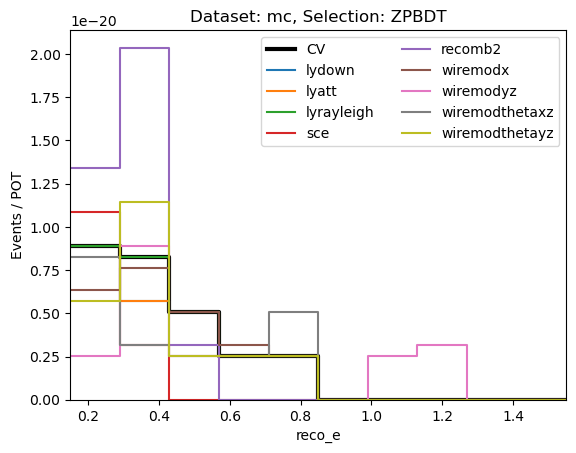

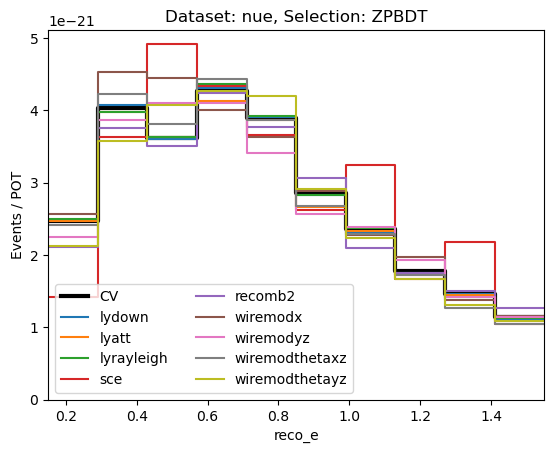

In [30]:
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

np_binning = Binning.from_config(*binning_def)
np_binning.label = "ZPBDT"
selection = "ZPBDT"
preselection = "ZP"

np_detvars = detsys.make_variations(
    RUN,
    "bnb",
    selection,
    preselection,
    np_binning,
    make_plots=True,
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=False,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

In [31]:
signal_generator_np = hist.RunHistGenerator(
    rundata,
    np_binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data_path=np_detvars,
)

cov_non_zero:
[[0.36662976 0.38983393 0.19241535 0.11804084 0.08746606 0.04396418
  0.0386658  0.04853272 0.01908413 0.01552034]
 [0.38983393 0.69841835 0.21092352 0.12222496 0.0989321  0.05314311
  0.04244379 0.06633897 0.02005259 0.01680963]
 [0.19241535 0.21092352 0.13790457 0.07157358 0.05341588 0.02740714
  0.02301874 0.03496857 0.0101888  0.00956344]
 [0.11804084 0.12222496 0.07157358 0.06348254 0.0448622  0.03033103
  0.02160493 0.02254205 0.01096867 0.00756814]
 [0.08746606 0.0989321  0.05341588 0.0448622  0.04398213 0.02485142
  0.02035407 0.02355483 0.00986281 0.00673815]
 [0.04396418 0.05314311 0.02740714 0.03033103 0.02485142 0.01945943
  0.01342047 0.01311857 0.0062376  0.00401415]
 [0.0386658  0.04244379 0.02301874 0.02160493 0.02035407 0.01342047
  0.01609329 0.00965804 0.00632707 0.0039269 ]
 [0.04853272 0.06633897 0.03496857 0.02254205 0.02355483 0.01311857
  0.00965804 0.0229293  0.00427282 0.00346933]
 [0.01908413 0.02005259 0.0101888  0.01096867 0.00986281 0.0062376

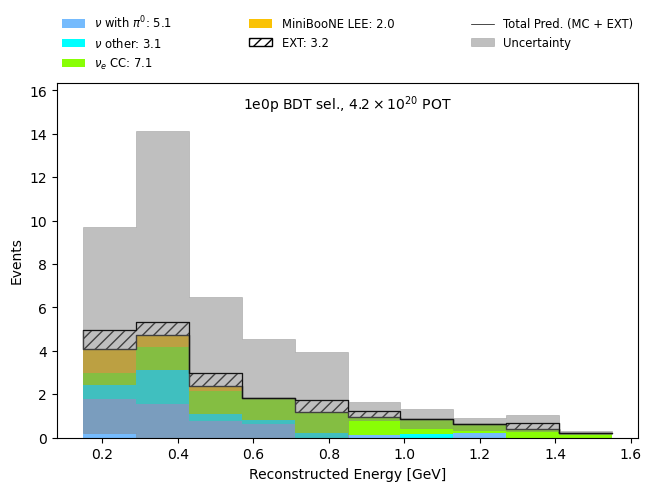

In [32]:
ax = RunHistPlotter(signal_generator_np).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",add_precomputed_detsys=True
)